# Regression and its Evaluation

1. What is Simple Linear Regression?

  -> Simple Linear Regression is one of the most basic statistical and machine learning techniques used to study the relationship between two variables that is : INDEPENDENT VARIABLE and DEPENDANT VARIABLE. It assumes that the relationship between them can be represented by a straight line.


2.  What are the key assumptions of Simple Linear Regression?

   -> 1. Linearity

  The relationship between the independent variable
𝑋
X and the dependent variable
𝑌
Y is linear.

This means
𝑌
changes at a constant rate with respect to
𝑋

  2. Independence of Errors (No Autocorrelation)

The residuals (errors,
𝜀
ε) are independent of each other.

   3. Homoscedasticity (Constant Variance of Errors)

The variance of residuals should remain constant across all values of
𝑋
X.

If variance increases or decreases with
𝑋
X (called heteroscedasticity), estimates become inefficient.

  4. No Perfect Multicollinearity.

  5. Exogeneity (No Omitted Variable Bias)

The independent variable
𝑋
X should not be correlated with the error term
𝜀
ε.

If there are missing important predictors, this assumption is violated, leading to biased estimates.


3. What is heteroscedasticity, and why is it important to address in regression
models?

   -> Heteroscedasticity occurs when the variance of the error terms (residuals) is not constant across all levels of the independent variable(s).
        
     i. Does not bias coefficient estimates.

     ii. But makes them inefficient.

     iii. Invalid statistical inference.

4. What is Multiple Linear Regression?

   -> Multiple Linear Regression (MLR) is a statistical technique used to model the relationship between a dependent variable (Y) and two or more independent (predictor) variables (X₁, X₂, …, Xₖ).

 It estimates how each independent variable affects the dependent variable, holding the other variables constant.


5. What is polynomial regression, and how does it differ from linear
regression?
  
   -> Polynomial Regression is a type of regression analysis in which the relationship between the independent variable
 𝑋
and the dependent variable
𝑌
is modeled as an nth-degree polynomial.


6. Implement a Python program to fit a Simple Linear Regression model to
the following sample data:
● X = [1, 2, 3, 4, 5]
● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Intercept (β0): 0.17999999999999794
Slope (β1): 1.9800000000000004


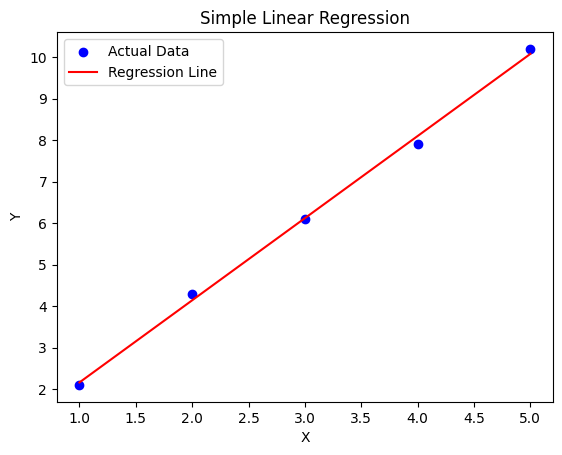

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # reshape for sklearn
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and fit the model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Coefficients
print("Intercept (β0):", model.intercept_)
print("Slope (β1):", model.coef_[0])

# Visualization
plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X, Y_pred, color='red', label="Regression Line")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()


7. Fit a Multiple Linear Regression model on this sample data:
● Area = [1200, 1500, 1800, 2000]
● Rooms = [2, 3, 3, 4]
● Price = [250000, 300000, 320000, 370000]
Check for multicollinearity using VIF and report the results.


In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample data
data = {
    "Area": [1200, 1500, 1800, 2000],
    "Rooms": [2, 3, 3, 4],
    "Price": [250000, 300000, 320000, 370000]
}

df = pd.DataFrame(data)

# Independent variables (X) and dependent variable (Y)
X = df[["Area", "Rooms"]]
Y = df["Price"]

# Add constant for intercept
X_const = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X_const).fit()

# Print summary
print(model.summary())

# ---- Checking Multicollinearity (VIF) ----
vif_data = pd.DataFrame()
vif_data["Feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                   for i in range(X_const.shape[1])]

print("\nVariance Inflation Factors:")
print(vif_data)


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     351.0
Date:                Thu, 28 Aug 2025   Prob (F-statistic):             0.0377
Time:                        06:54:23   Log-Likelihood:                -35.242
No. Observations:                   4   AIC:                             76.48
Df Residuals:                       1   BIC:                             74.64
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+05   9488.293     10.872      0.0

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


8. Implement polynomial regression on the following data:
● X = [1, 2, 3, 4, 5]
3
● Y = [2.2, 4.8, 7.5, 11.2, 14.7]
Fit a 2nd-degree polynomial and plot the resulting curve.

Intercept (β0): 0.06000000000000938
Coefficients (β1, β2): [1.94 0.2 ]


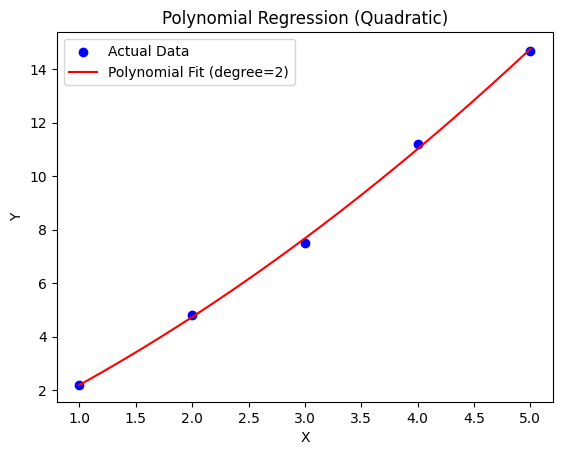

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features (degree = 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, Y)

# Predictions
X_range = np.linspace(1, 5, 100).reshape(-1, 1)  # smoother curve
X_range_poly = poly.transform(X_range)
Y_pred = model.predict(X_range_poly)

# Coefficients
print("Intercept (β0):", model.intercept_)
print("Coefficients (β1, β2):", model.coef_[1:])

# Plot
plt.scatter(X, Y, color='blue', label="Actual Data")
plt.plot(X_range, Y_pred, color='red', label="Polynomial Fit (degree=2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Polynomial Regression (Quadratic)")
plt.legend()
plt.show()


9. Create a residuals plot for a regression model trained on this data:
● X = [10, 20, 30, 40, 50]
● Y = [15, 35, 40, 50, 65]
Assess heteroscedasticity by examining the spread of residuals.

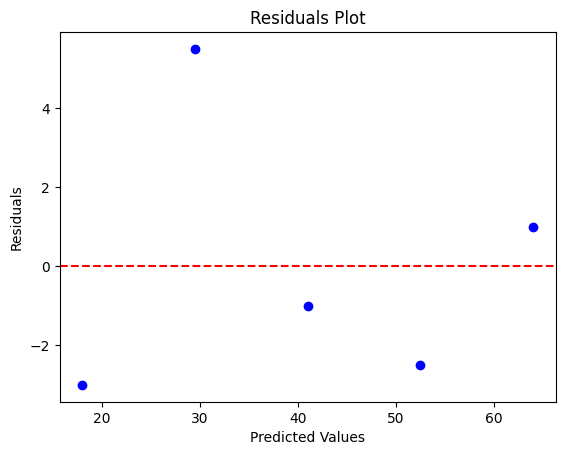

Residuals: [-3.   5.5 -1.  -2.5  1. ]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit Linear Regression model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Calculate residuals
residuals = Y - Y_pred

# Plot residuals vs. predicted values
plt.scatter(Y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals Plot")
plt.show()

# Print residuals for inspection
print("Residuals:", residuals)


10. Imagine you are a data scientist working for a real estate company. You
need to predict house prices using features like area, number of rooms, and location.
However, you detect heteroscedasticity and multicollinearity in your regression
model. Explain the steps you would take to address these issues and ensure a robust
model.


  -> 1. Addressing Heteroscedasticity

   Problem:

Residuals spread unevenly — e.g., expensive houses have much larger prediction errors than cheap houses.

 Solutions:

Data Transformation:

Apply log or square-root transformation on the dependent variable (Price) to stabilize variance.

Example: use log(Price) instead of raw Price.

Weighted Least Squares (WLS):

Assign lower weights to observations with large variance.

Robust Standard Errors:

Use heteroscedasticity-consistent SEs (e.g., White’s standard errors) so hypothesis testing remains valid.

2. Addressing Multicollinearity

 Problem:

Independent variables are strongly correlated — e.g., Area and Rooms. This inflates standard errors and makes coefficients unstable.

 Solutions:

Detect with VIF (Variance Inflation Factor):

Drop variables with high VIF (>10).

Feature Engineering:

Combine correlated predictors into one (e.g., create “Area per Room” or use “Total Living Space”).

Regularization Methods:

Use Ridge Regression (L2) to shrink coefficients of correlated predictors.

Use Lasso Regression (L1) to perform feature selection.

3. Ensuring a Robust Model

Cross-validation: Evaluate performance stability across folds.

Check residual plots: Verify that heteroscedasticity has been reduced.

Recompute VIFs: Ensure no severe multicollinearity remains.

Model alternatives: Consider tree-based models (Random Forest, Gradient Boosting) since they are less sensitive to multicollinearity and heteroscedasticity.